In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [477]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
GRID_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_5000_4/spectra.h5'

SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [469]:
wave.shape

(15404,)

In [473]:
np.save("/scratch/ceph/szalay/swei20/AE/wave", wave)

In [470]:
with h5py.File(SZALAY_PATH, 'a') as f:
    f.create_dataset('wave', data = wave, shape = (15404,))  

In [ ]:
with h5py.File(SZALAY_PATH, 'r') as f:
    wave = f['wave'][()]

In [327]:
with h5py.File(PCA_PATH, 'r') as f:
#     flux = f['flux'][()]
#     flux_idx = f['flux_idx'][()]
    Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
#     wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]    

In [278]:
flux0 = flux[flux_idx]

In [474]:
wave.shape

(15404,)

In [5]:
 eigv.shape, wave.shape, eigs.shape

((15404, 1000), (15404,), (1000,))

In [331]:
Fe_H

array([-2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 ,
       -0.25,  0.  ,  0.25,  0.5 ,  0.75])

In [332]:
np.where(Fe_H==0)

(array([10]),)

In [334]:
fluxx0 = flux[10,6,8,3,1]

In [ ]:
# u, s, v = np.linalg.svd(flux0.T)

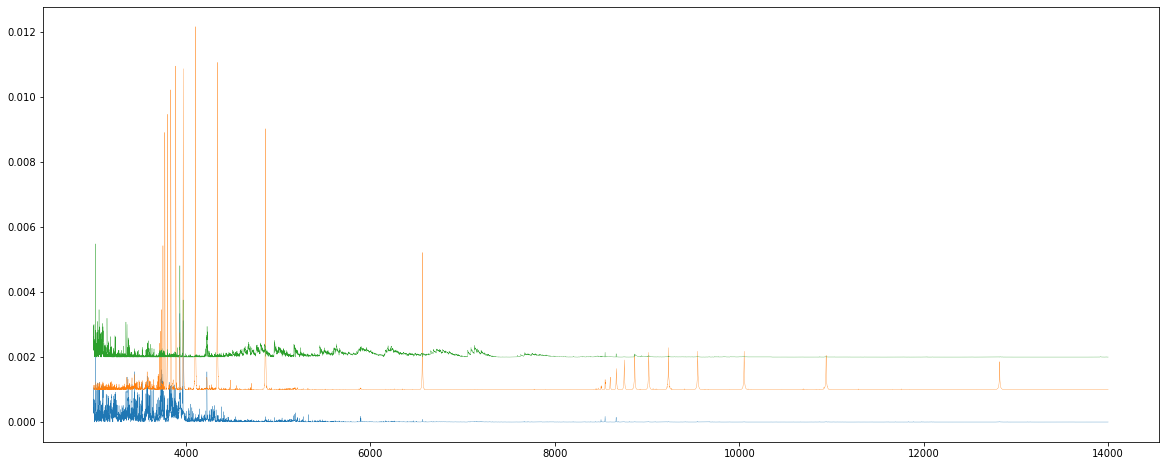

In [66]:
f, ax = plt.subplots(figsize=(20, 8))
ii = [0, 0.001, 0.002]
for i, k in enumerate([0, 1, 2]):
    ax.plot(wave, V[:, k] + ii[i], lw=0.3)
# ax.semilogy()

In [69]:
# LS = np.cumsum(V, axis = 1) / np.arange(1, len(eigv[0])+1)
LS.shape

(15404, 1000)

In [71]:
LS

array([[4.57941510e-04, 2.41155351e-04, 3.68600712e-04, ...,
        3.84765819e-04, 3.87236041e-04, 3.87079113e-04],
       [3.89313473e-04, 2.07272128e-04, 2.66161602e-04, ...,
        2.87458160e-04, 2.87616254e-04, 2.87346655e-04],
       [2.63198546e-04, 1.36702811e-04, 1.57269881e-04, ...,
        2.61795828e-04, 2.61555424e-04, 2.61587759e-04],
       ...,
       [1.11942722e-07, 6.46183338e-08, 1.40287987e-07, ...,
        5.09007638e-06, 5.08963361e-06, 5.08940599e-06],
       [3.38553471e-07, 1.69387975e-07, 1.46105978e-07, ...,
        7.21609379e-06, 7.22220879e-06, 7.22541398e-06],
       [1.31379151e-06, 6.60049737e-07, 4.86382584e-07, ...,
        2.20412185e-05, 2.21746267e-05, 2.21658498e-05]])

In [465]:
plt.style.use('default')

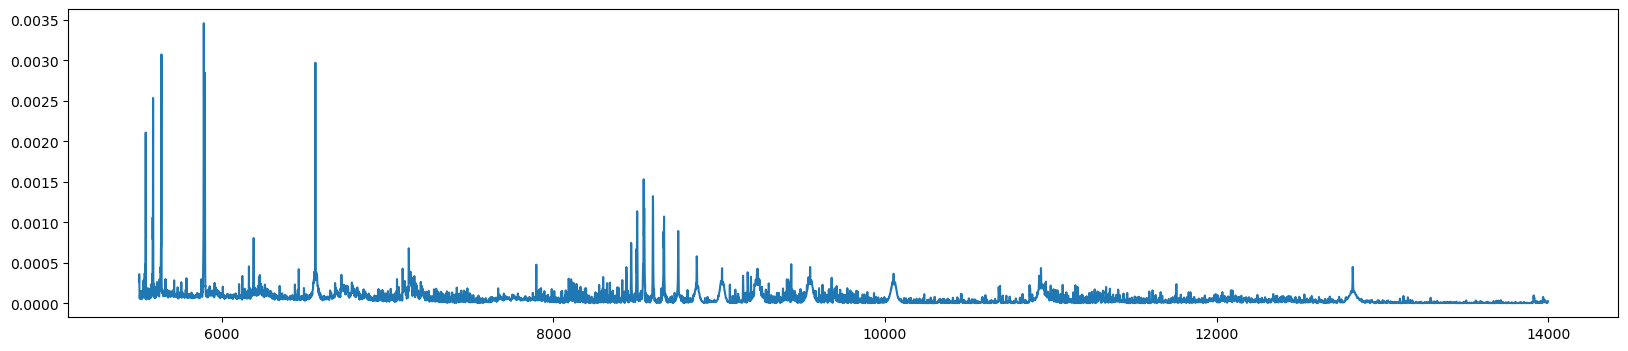

In [467]:
plt.figure(figsize=(20,4))
plt.plot(self.wave, (self.lvrg[:,10]*10 - self.lvrg[:,3]*3) )

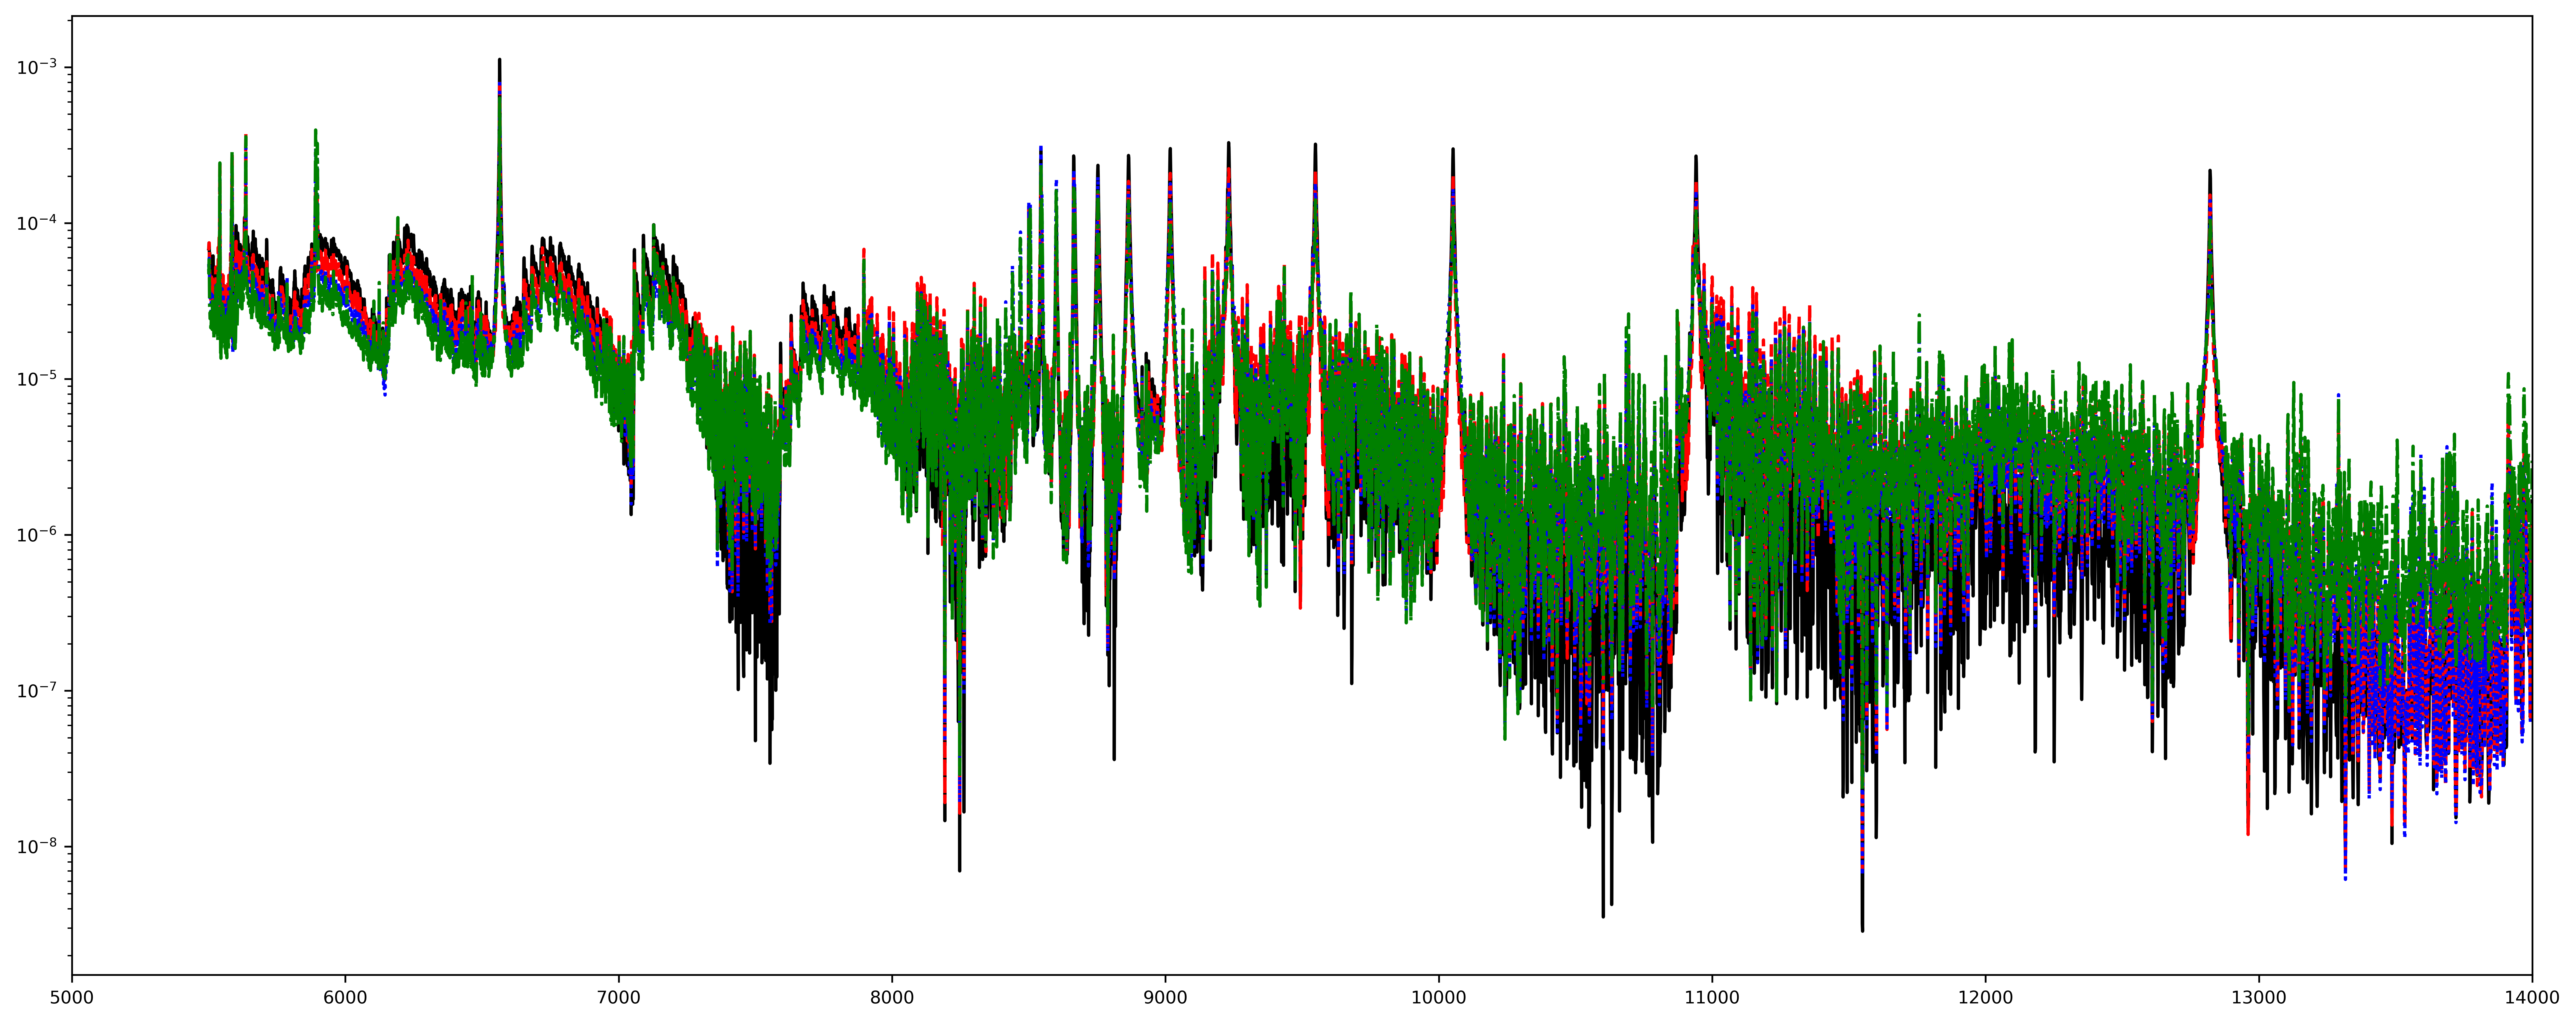

In [462]:
f, ax = plt.subplots(figsize=(20, 8))

# LS1 = np.cumsum(V, axis = 1)
for k in [3,5,7,10]:
    plt.plot(self.wave, self.lvrg[:,k])
plt.xlim(5000, 14000)
plt.yscale("log")
# plt.ylim(0., 0.0005)

In [23]:
np.digitize(5000, wave)

5108

In [75]:
LS0 = LS[5108:, :]

In [24]:
wave0 = wave[5108:]

In [77]:

pidx = np.argmax(LS0[:,200])

In [78]:
pidx

1640

In [27]:
pmax = LS0[2722, 200]

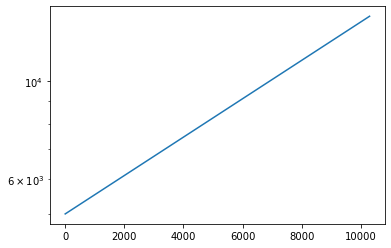

In [32]:
plt.plot(wave0)
# plt.xscale('log')
plt.yscale('log')

In [33]:
logwave= np.log(wave0)

In [34]:
logedge= 0.5 * (logwave[1:] + logwave[:-1])

In [35]:
logedge

array([8.5173047 , 8.51740474, 8.51750476, ..., 9.54650302, 9.54660301,
       9.54670302])

In [36]:
logwave

array([8.51725471, 8.5173547 , 8.51745478, ..., 9.54655302, 9.546653  ,
       9.54675304])

In [39]:
step = (logwave[1:] - logedge) [0]

In [40]:
step

4.999442466413484e-05

In [27]:
wave0[-1] - wave0[-2]

1.4003999999986263

In [41]:
dlambda = wave0 / 5000 

In [42]:
dlambda

array([1.00006152, 1.00016152, 1.00026162, ..., 2.79927324, 2.79955312,
       2.7998332 ])

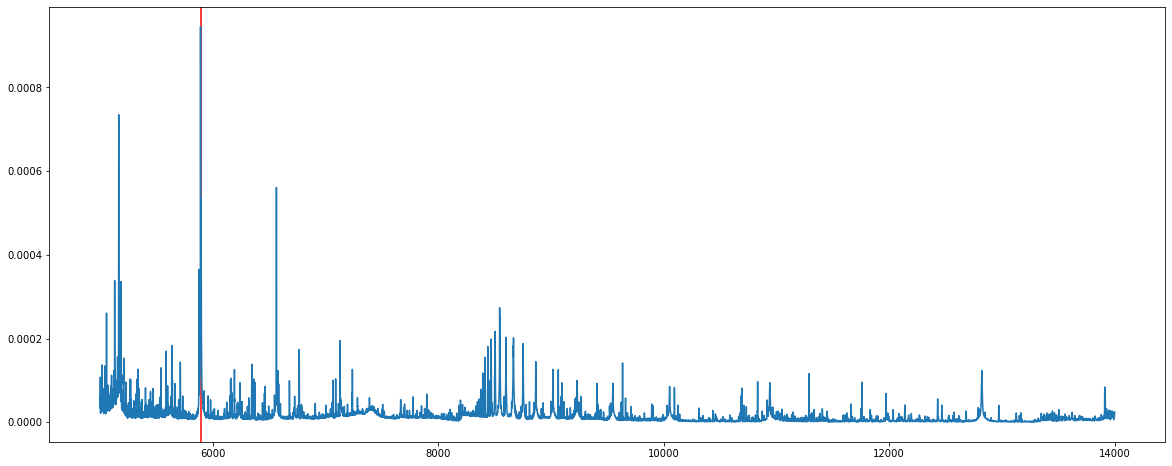

In [79]:
plt.figure(figsize=(20,8))
plt.axvline(wave0[pidx], c='r')
plt.plot(wave0, LS0[:,200])


In [379]:
from lv.leverage_score import LeverageScore

In [348]:
K = 2
T = 1
N = 16
self=LeverageScore(wave, eigv, K, T, N, wv_lb=0, debug=0)

In [349]:
self.find_all_rois()

INFO:root:P: 6564.6489 | ROI: [6414.1021, 6653.8721]
INFO:root:P: 9231.2871 | ROI: [9035.8359, 9334.3242]
INFO:root:P: 9548.6367 | ROI: [9250.6924, 9597.459]
INFO:root:P: 10052.2676 | ROI: [9571.5811, 10133.0088]
INFO:root:P: 9017.7822 | ROI: [8880.8604, 9059.3594]
INFO:root:P: 8864.8896 | ROI: [8835.6836, 9005.167]
INFO:root:P: 10940.791 | ROI: [10095.5859, 11028.668]
INFO:root:P: 8753.0176 | ROI: [8674.5938, 8783.707]
INFO:root:P: 12821.1719 | ROI: [12034.7461, 12895.751]
INFO:root:P: 8665.0576 | ROI: [8605.4746, 8692.8301]
INFO:root:P: 8544.5918 | ROI: [8507.0781, 8559.1299]
INFO:root:P: 5171.6895 | ROI: [5169.104, 5175.8281]
INFO:root:P: 5180.4888 | ROI: [5176.8633, 5184.1162]
INFO:root:P: 5176.3457 | ROI: [5174.793, 5179.4526]
INFO:root:P: 5631.6318 | ROI: [5631.0688, 5636.7031]
INFO:root:P: 8601.1729 | ROI: [8552.2861, 8616.6689]


Text(0.5, 0.98, 'Teff=5k | Fe/H = CM = OM = 0 | Log(g) = 4')

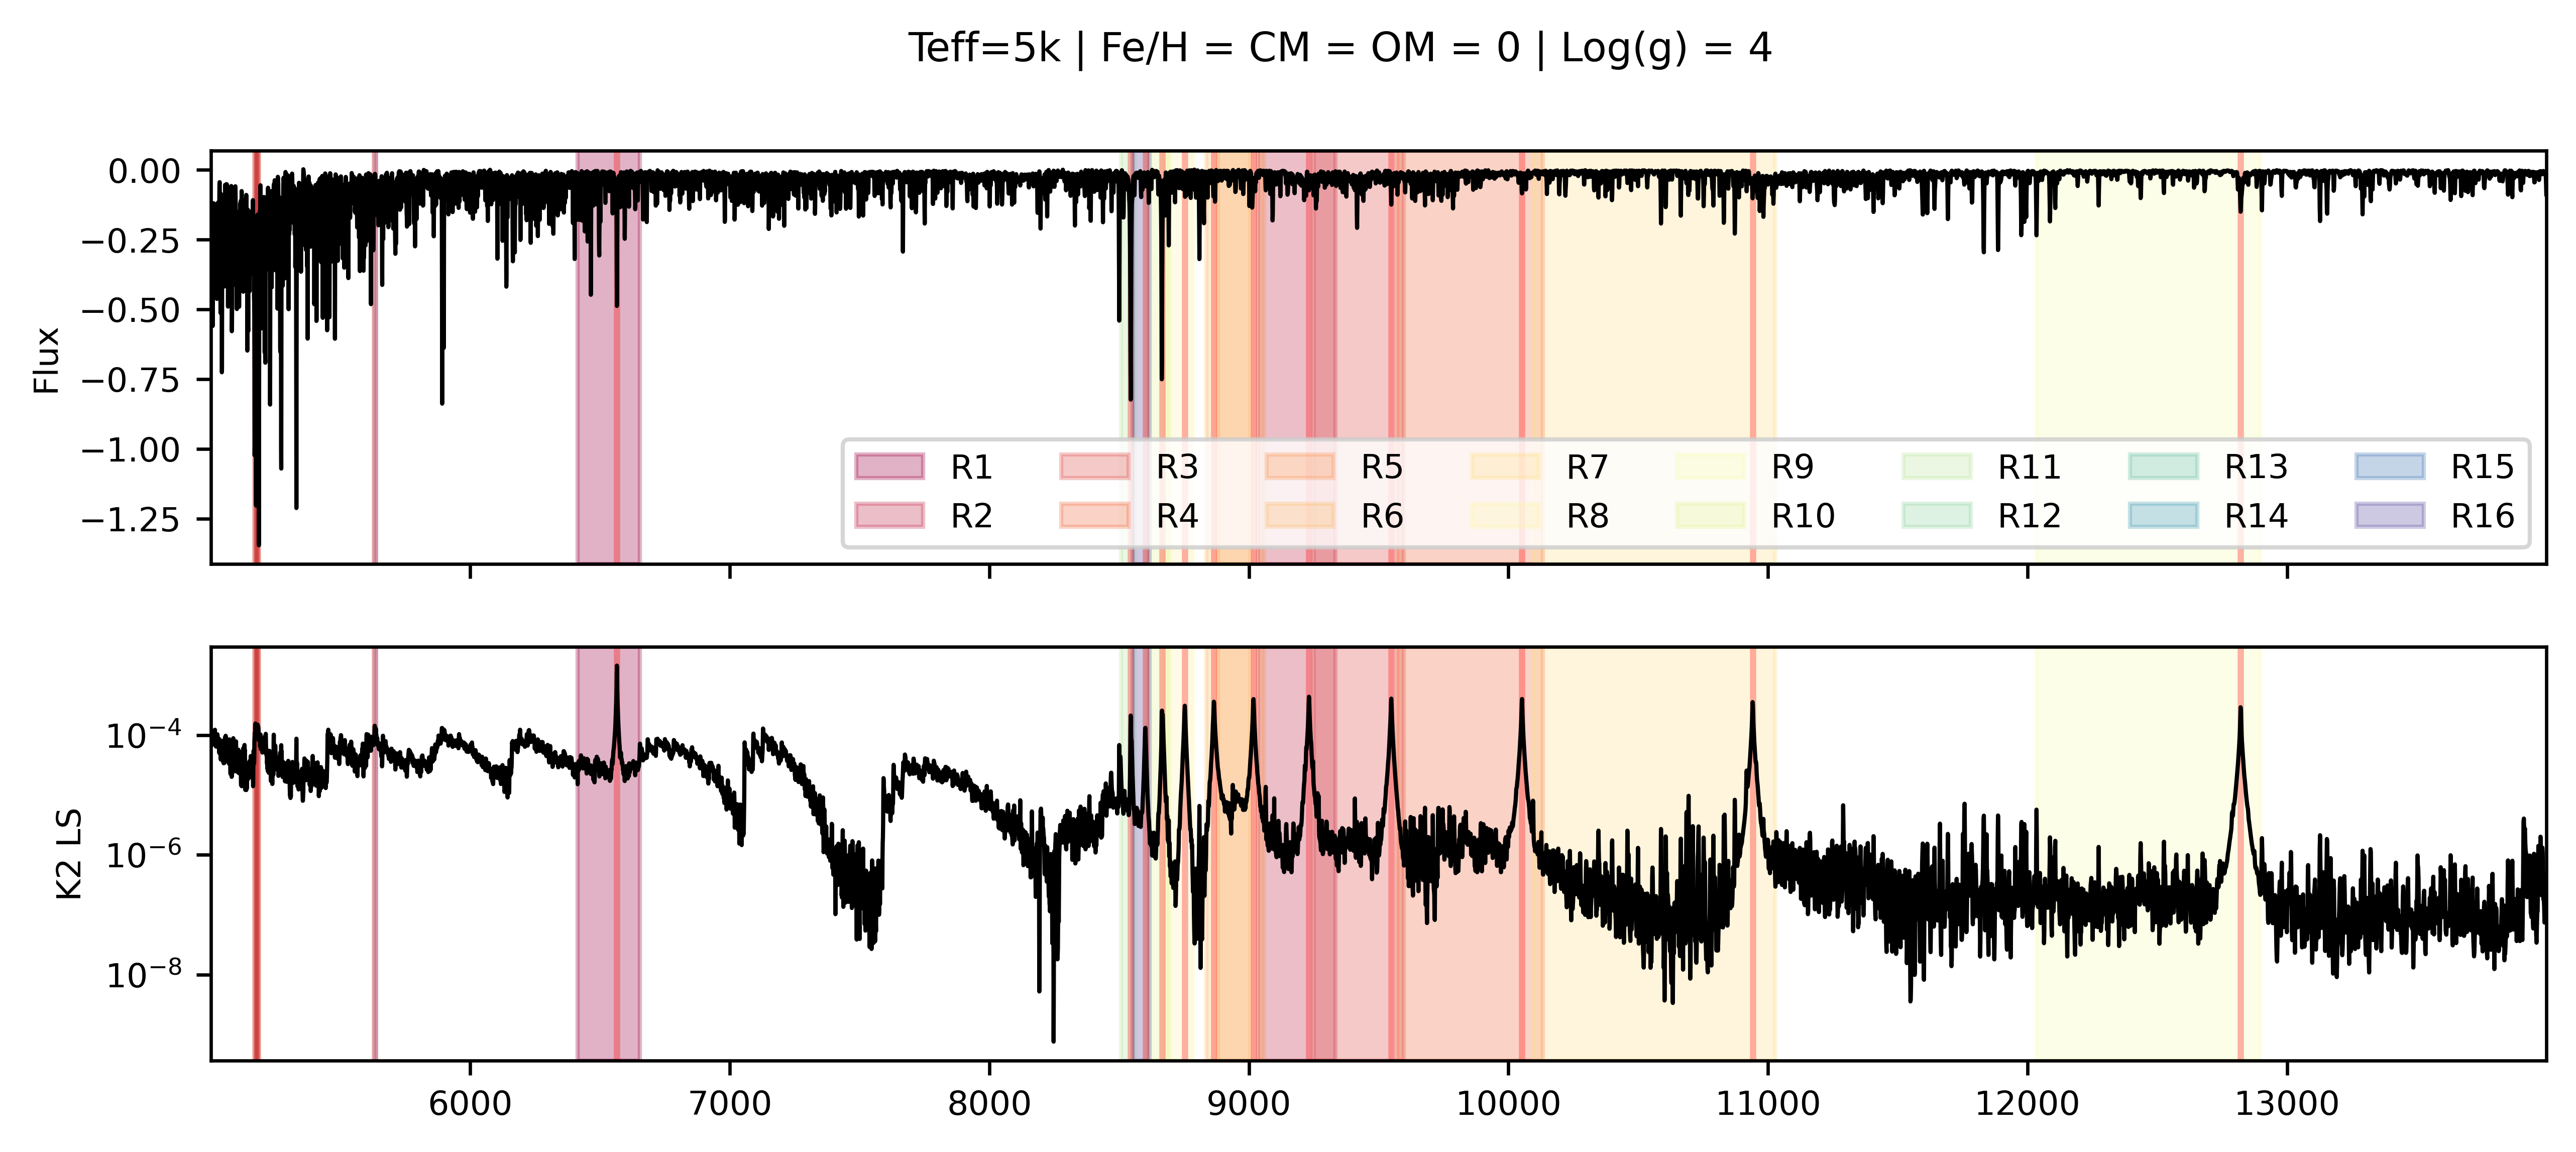

In [350]:
f, axs = plt.subplots(2,1, figsize=(10,4), sharex="all")
self.plot_all(flux=fluxx1, log=0, ax=axs[0])
self.plot_all(flux=None, log=1, ax=axs[1])
f.suptitle("Teff=5k | Fe/H = CM = OM = 0 | Log(g) = 4")

In [351]:
K = 20
T = 1
N = 26
self=LeverageScore(wave, eigv, K, T, N, wv_lb=5000, debug=0)

In [352]:
self.find_all_rois()

INFO:root:P: 5877.3101 | ROI: [5874.96, 5889.0767]
INFO:root:P: 6564.6489 | ROI: [6496.0811, 6619.3623]
INFO:root:P: 5165.4873 | ROI: [5159.292, 5169.104]
INFO:root:P: 5129.9683 | ROI: [5117.1592, 5146.9248]
INFO:root:P: 5891.4326 | ROI: [5889.0767, 5897.3267]
INFO:root:P: 6679.873 | ROI: [6677.8691, 6717.3853]
INFO:root:P: 5185.1533 | ROI: [5174.793, 5187.7466]
INFO:root:P: 5016.8359 | ROI: [5002.8086, 5021.855]
INFO:root:P: 5174.2764 | ROI: [5169.104, 5177.3818]
INFO:root:P: 5897.3267 | ROI: [5893.2002, 5899.6865]
INFO:root:P: 10833.0127 | ROI: [10809.2051, 10873.1689]
INFO:root:P: 7067.4438 | ROI: [7057.5566, 7073.1001]
INFO:root:P: 5636.1387 | ROI: [5600.7427, 5650.2471]
INFO:root:P: 8548.0098 | ROI: [8507.0781, 8565.123]
INFO:root:P: 8667.6572 | ROI: [8607.1953, 8717.2041]
INFO:root:P: 5585.6416 | ROI: [5576.1543, 5600.1831]
INFO:root:P: 5155.6816 | ROI: [5150.5293, 5160.3242]
INFO:root:P: 8601.1729 | ROI: [8553.9961, 8617.5303]
INFO:root:P: 5541.1348 | ROI: [5530.0635, 5545.0146]

In [353]:
# fluxx1 = fluxx0.dot(eigv.T)

Text(0.5, 0.98, 'Teff=5k | Fe/H = CM = OM = 0 | Log(g) = 4')

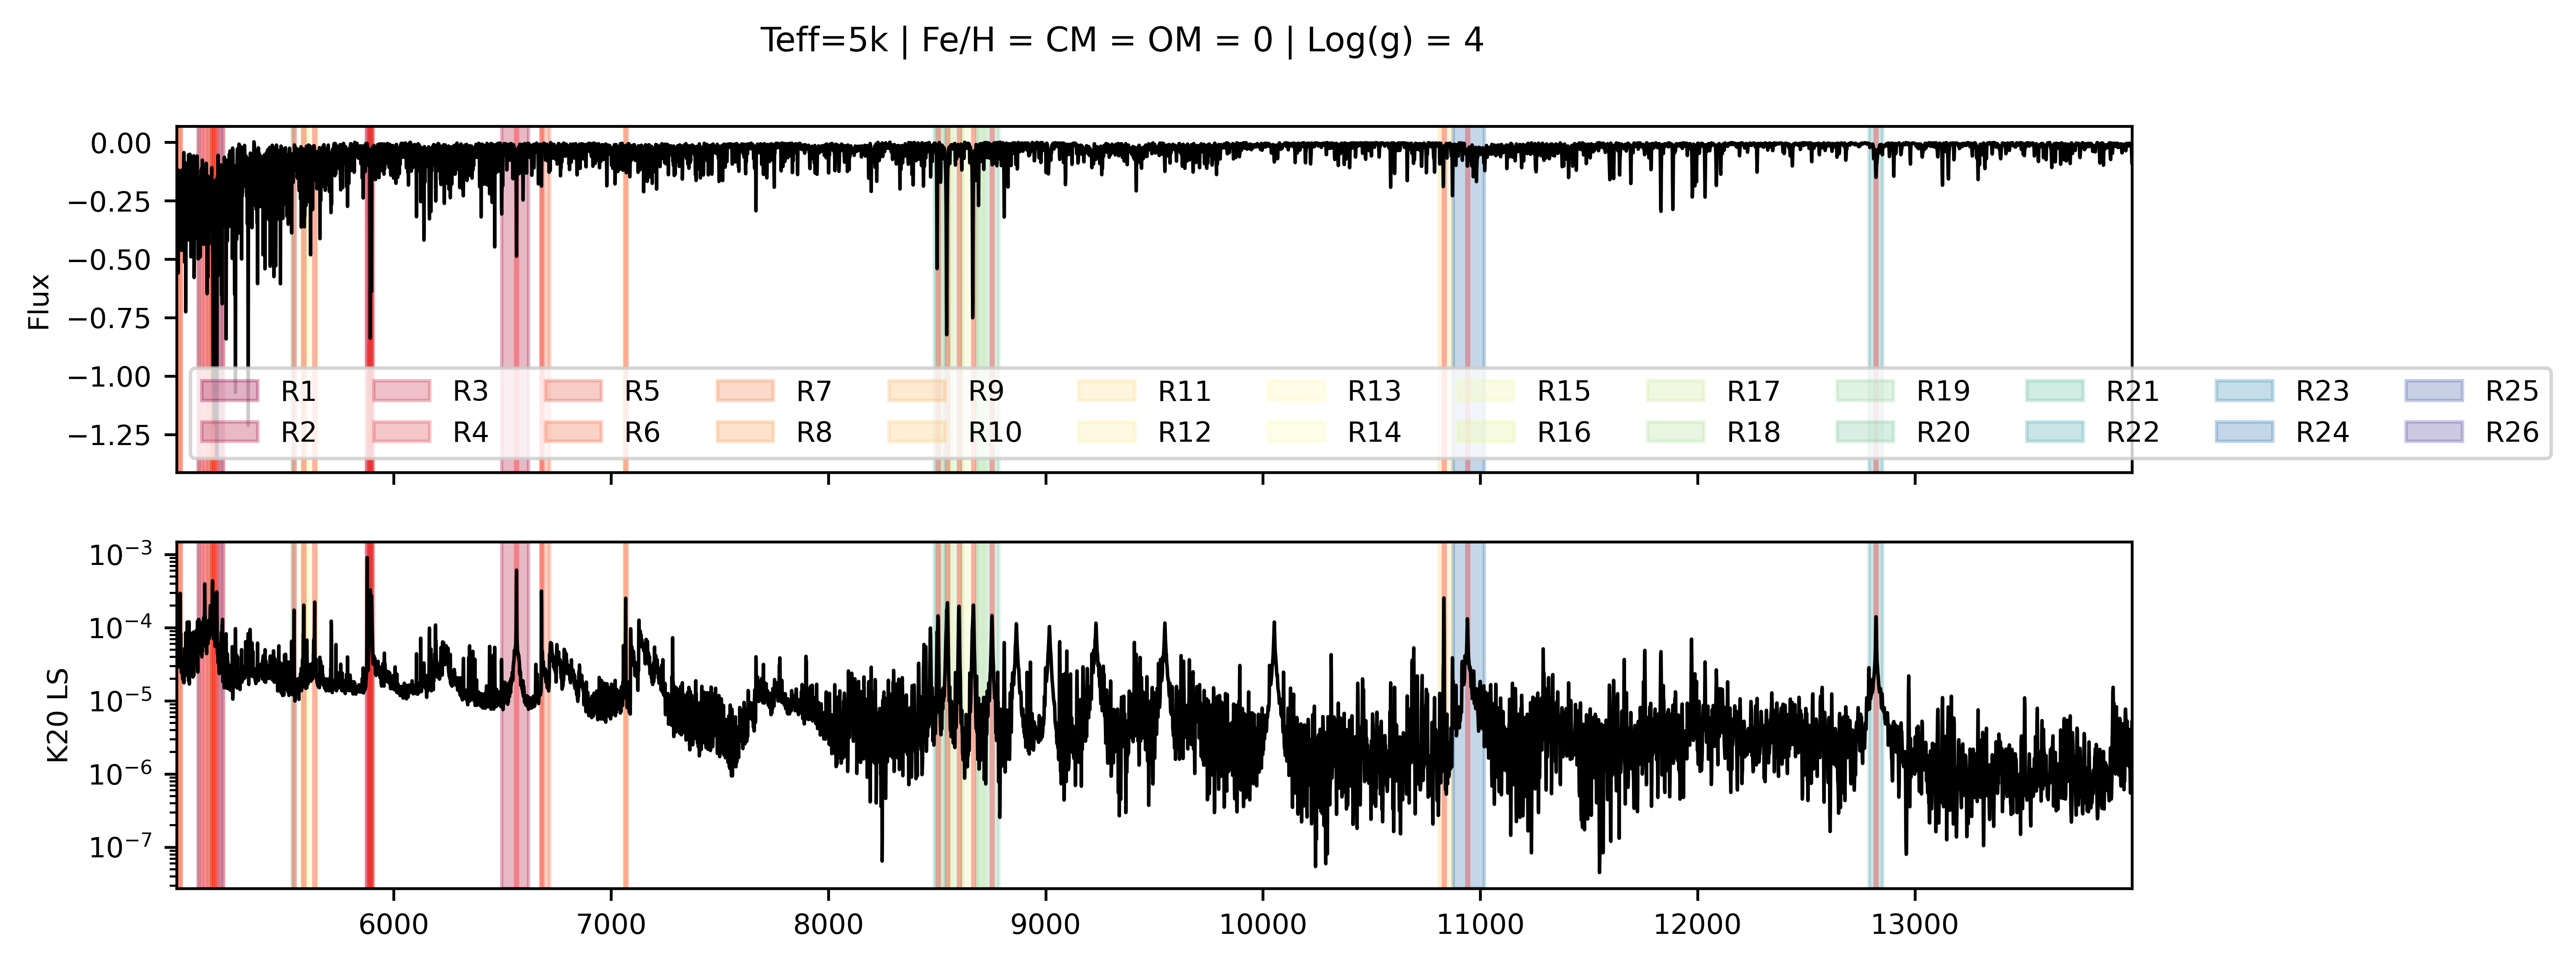

In [354]:
f, axs = plt.subplots(2,1, figsize=(10,4), sharex="all")
self.plot_all(flux=fluxx1, log=0, ax=axs[0])
self.plot_all(flux=None, log=1, ax=axs[1])
f.suptitle("Teff=5k | Fe/H = CM = OM = 0 | Log(g) = 4")

In [458]:
K = 10
T = 0.1
N = 10
wv_lb = 5500
self=LeverageScore(wave, eigv, K, T, N, wv_lb=wv_lb, debug=0)
self.find_all_rois()

INFO:root:P: 6564.6489 | ROI: [6525.3789, 6720.7446]
INFO:root:P: 5891.4326 | ROI: [5787.4932, 6066.6055]
INFO:root:P: 5636.1387 | ROI: [5586.7583, 5741.3774]
INFO:root:P: 5585.6416 | ROI: [5572.8096, 5635.5757]
INFO:root:P: 8544.5918 | ROI: [8432.5449, 8600.3125]
INFO:root:P: 5541.1348 | ROI: [5500.2812, 5583.9658]
INFO:root:P: 8665.0576 | ROI: [8639.1006, 8753.0176]
INFO:root:P: 8600.3125 | ROI: [8545.4463, 8620.1162]
INFO:root:P: 8753.0176 | ROI: [8668.5244, 8783.707]
INFO:root:P: 9231.2871 | ROI: [9025.9023, 9338.9932]


(5500.0, 9000.0)

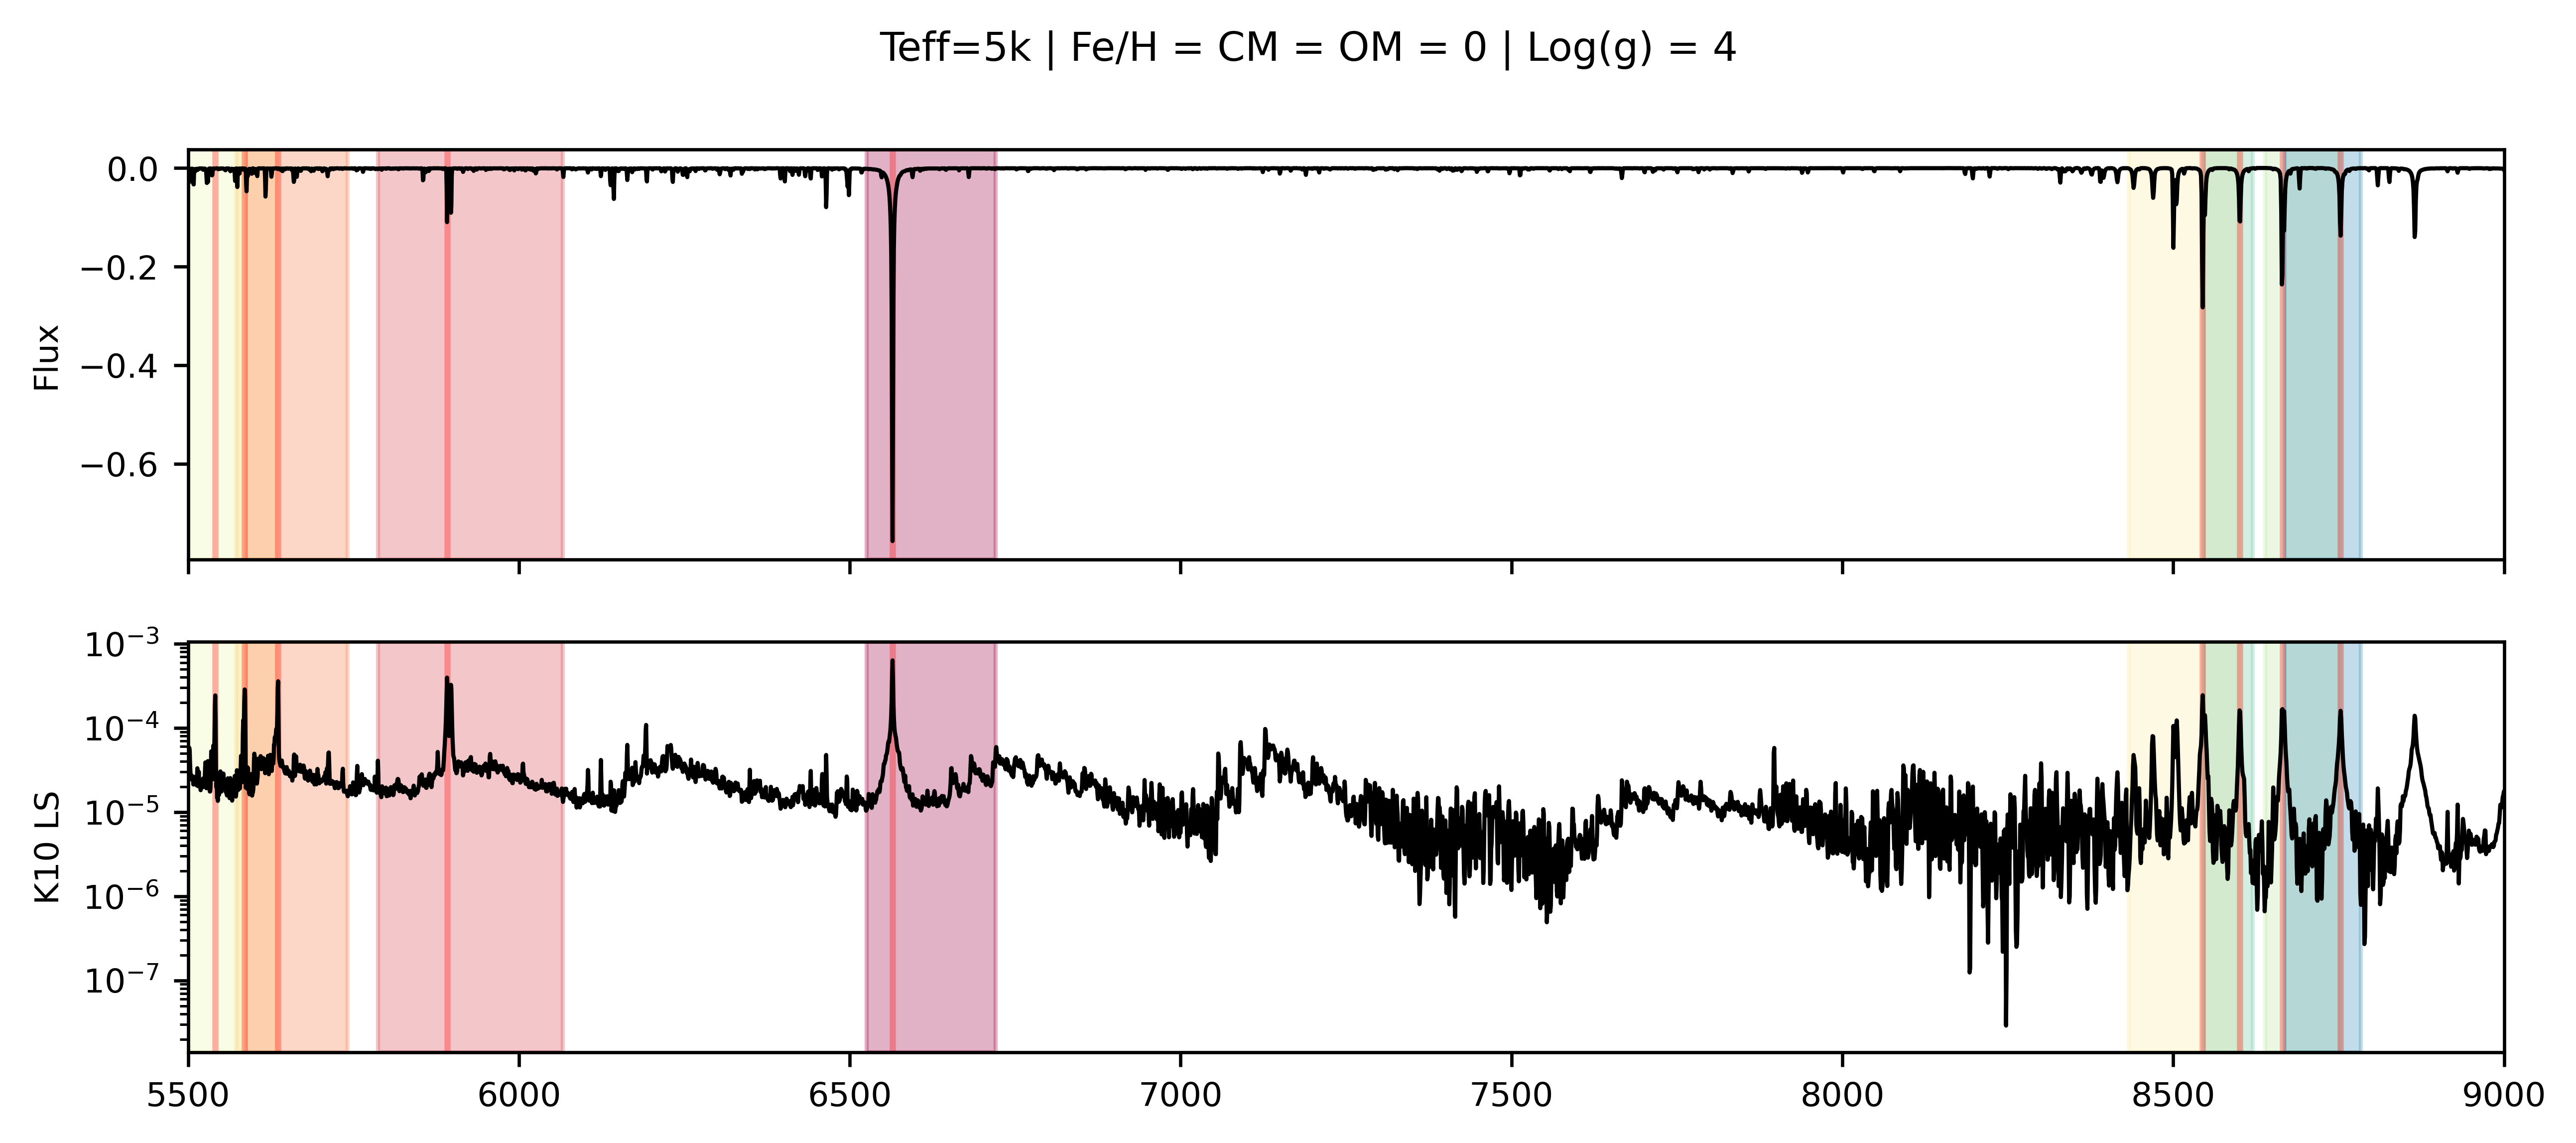

In [459]:
self.plot_flux_rois(fluxx, title="Teff=5k | Fe/H = CM = OM = 0 | Log(g) = 4")
plt.xlim(8000, 9000)

In [427]:
from lv.leverage_score import LeverageScore

In [450]:
K = 250
T = 0.05
N = 12
wv_lb = 4000
self=LeverageScore(wave, eigv, K, T, N, wv_lb=wv_lb, debug=0)
self.find_all_rois()

INFO:root:P: 4227.876 | ROI: [4197.9644, 4249.0684]
INFO:root:P: 4482.584 | ROI: [4436.6504, 4485.2744]
INFO:root:P: 4268.2319 | ROI: [4243.5479, 4282.769]
INFO:root:P: 5891.4326 | ROI: [5734.4922, 6063.5723]
INFO:root:P: 4714.2959 | ROI: [4702.0547, 4721.8447]
INFO:root:P: 4143.7441 | ROI: [4132.1577, 4159.936]
INFO:root:P: 5166.0034 | ROI: [5130.9941, 5191.3794]
INFO:root:P: 4909.6343 | ROI: [4862.7275, 4928.8193]
INFO:root:P: 6564.6489 | ROI: [6492.1846, 6680.541]
INFO:root:P: 4027.3147 | ROI: [4000.022, 4047.5015]
INFO:root:P: 4309.4043 | ROI: [4281.4839, 4323.6489]
INFO:root:P: 4403.9404 | ROI: [4399.0986, 4432.6592]


(4000.0, 6000.0)

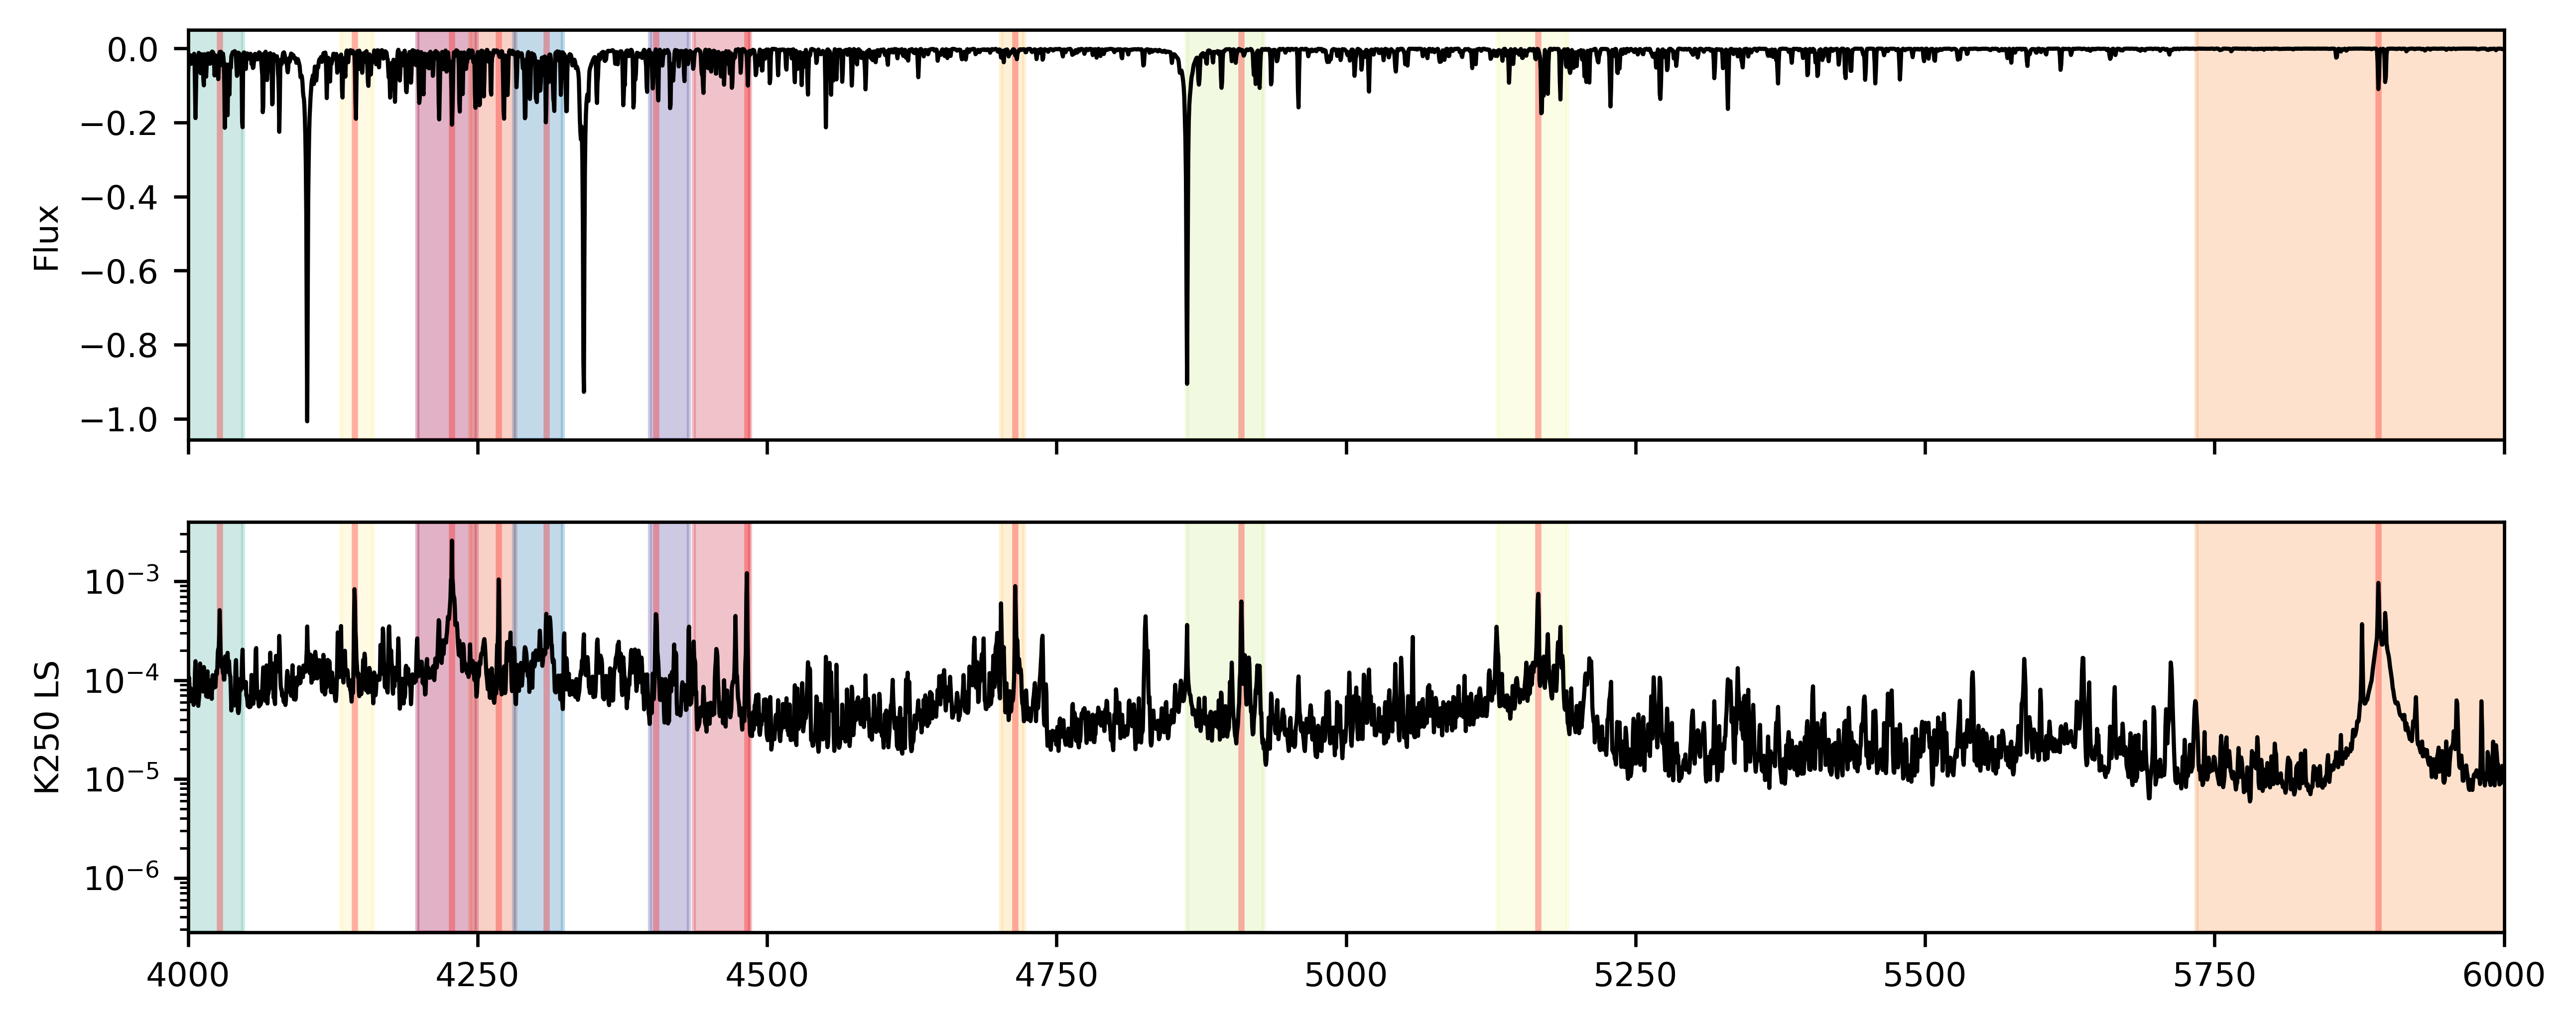

In [454]:
self.plot_flux_rois(fluxx)
plt.xlim(wv_lb, 6000)

In [ ]:
self.plot_flux_rois(fluxx)
plt.xlim(3800, 6050)

(4000.0, 6000.0)

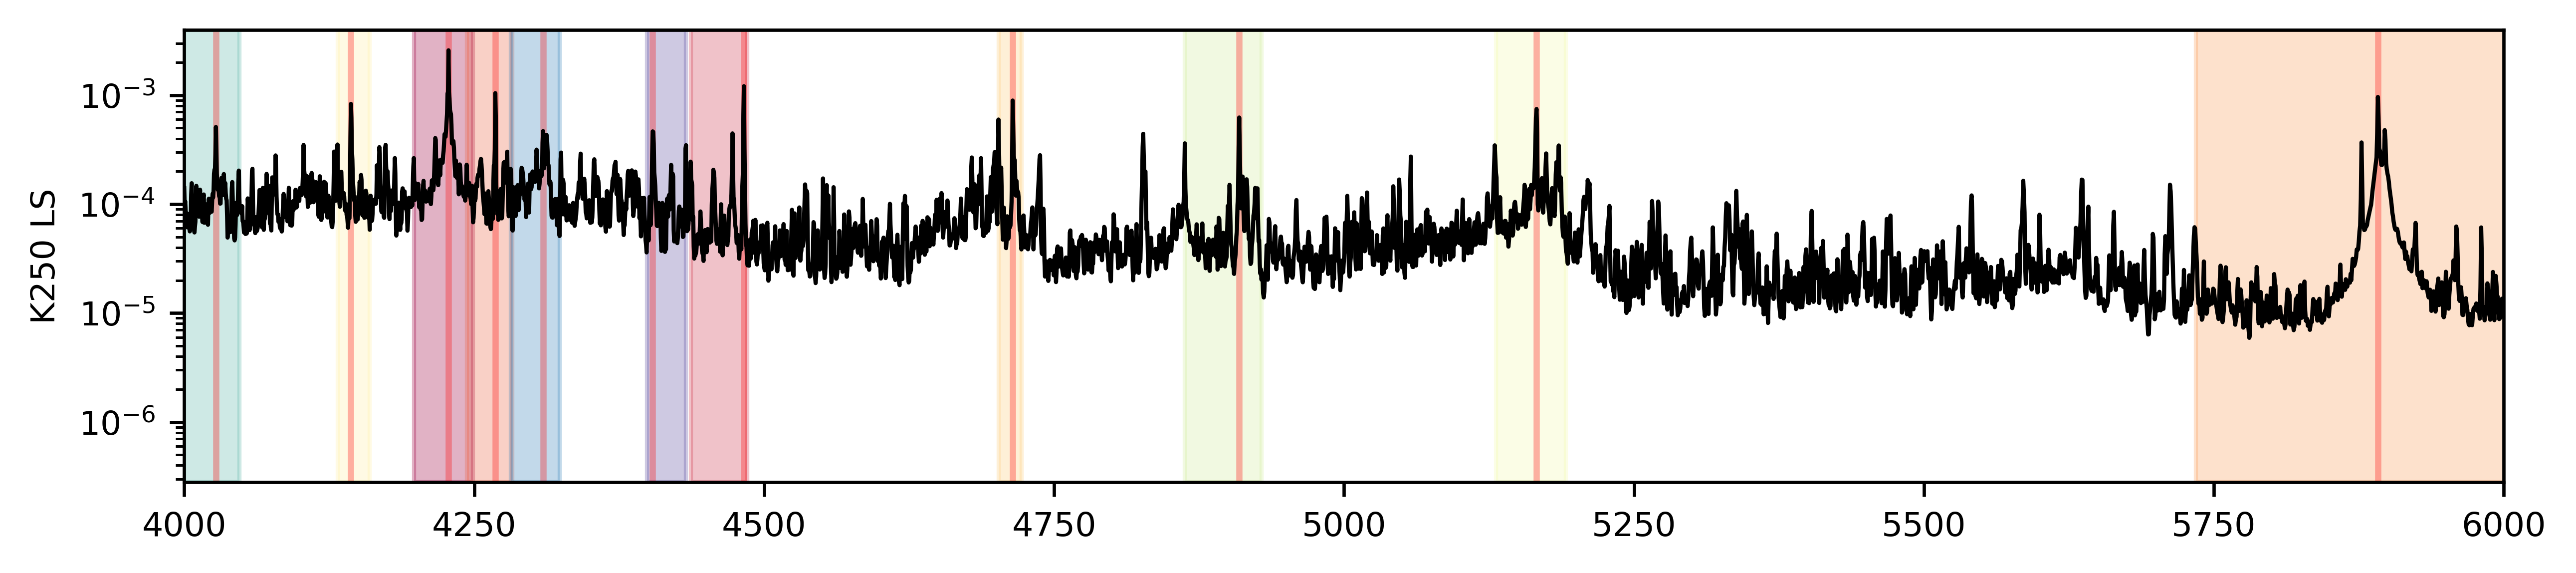

In [457]:
f, ax = plt.subplots(figsize=(10, 2))
self.plot_rois(flux=None,ax=ax,log=1)
plt.xlim(wv_lb, 6000)

(3800.0, 6050.0)

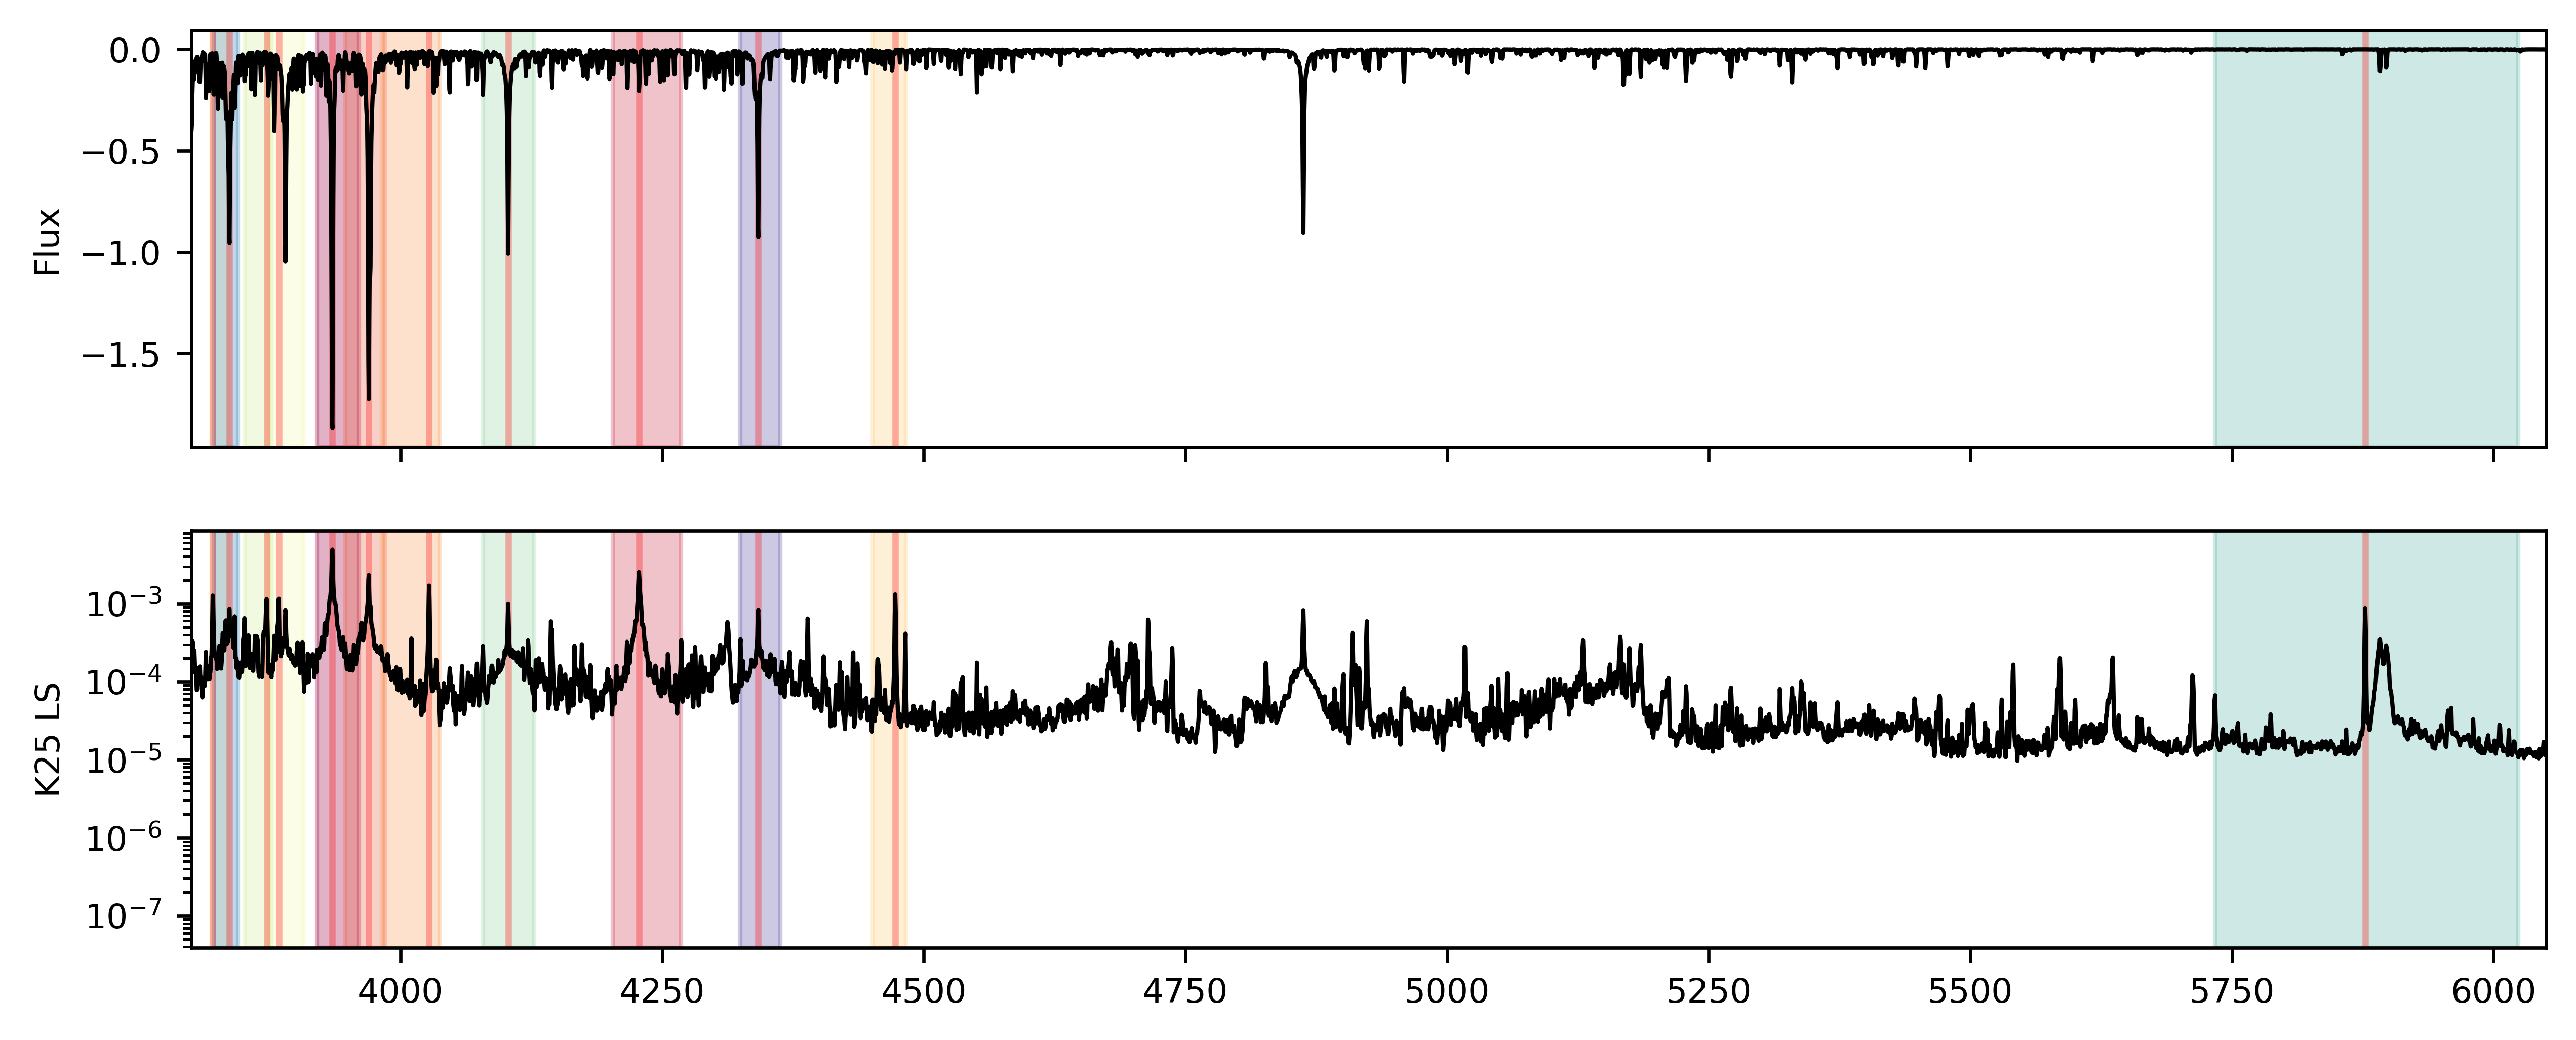

In [446]:
self.plot_rois(fluxx)
plt.xlim(3800, 6050)

In [438]:
K = 25
T = 0.05
N = 12
self=LeverageScore(wave, eigv, K, T, N, wv_lb=5500, debug=0)
self.find_all_rois()

INFO:root:P: 5877.3101 | ROI: [5874.96, 5890.8438]
INFO:root:P: 6564.6489 | ROI: [6496.0811, 6616.7144]
INFO:root:P: 5891.4326 | ROI: [5877.8979, 5915.0449]
INFO:root:P: 6679.873 | ROI: [6678.5371, 6784.8955]
INFO:root:P: 7067.4438 | ROI: [6937.2046, 7090.0957]
INFO:root:P: 10833.0127 | ROI: [10809.2051, 10939.6973]
INFO:root:P: 8548.0098 | ROI: [8506.2285, 8564.2666]
INFO:root:P: 8667.6572 | ROI: [8604.6133, 8699.7871]
INFO:root:P: 5636.1387 | ROI: [5586.2002, 5655.3345]
INFO:root:P: 5585.6416 | ROI: [5577.2695, 5633.8848]
INFO:root:P: 8601.1729 | ROI: [8550.5752, 8617.5303]
INFO:root:P: 12821.1719 | ROI: [12467.1592, 12960.3906]


(5500.0, 13000.0)

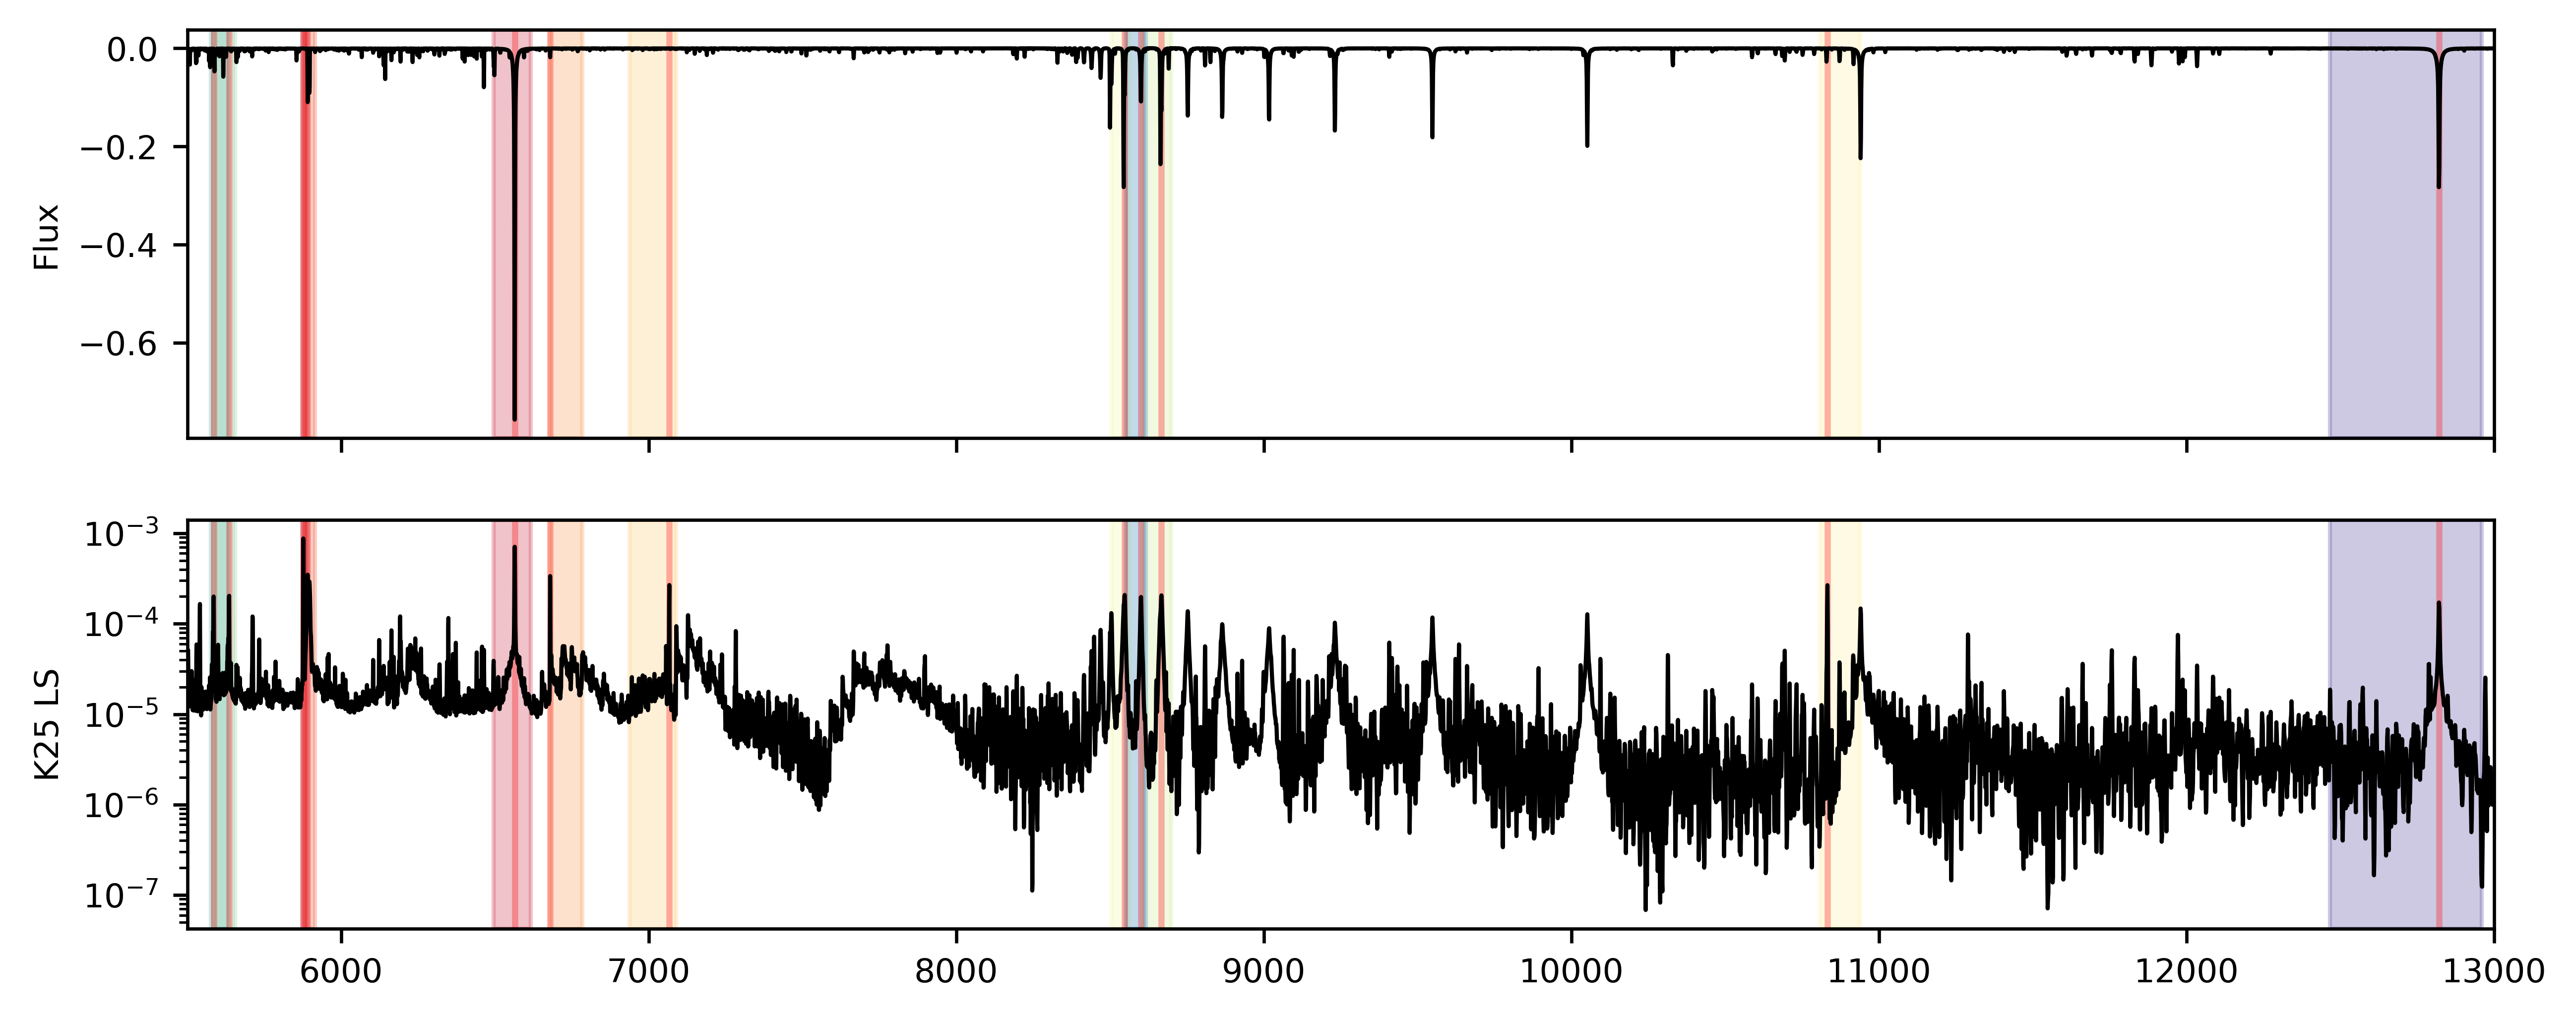

In [439]:
self.plot_flux_rois(fluxx)
plt.xlim(5500, 13000)
# plt.xlim(8300, 8800)

(5500.0, 8600.0)

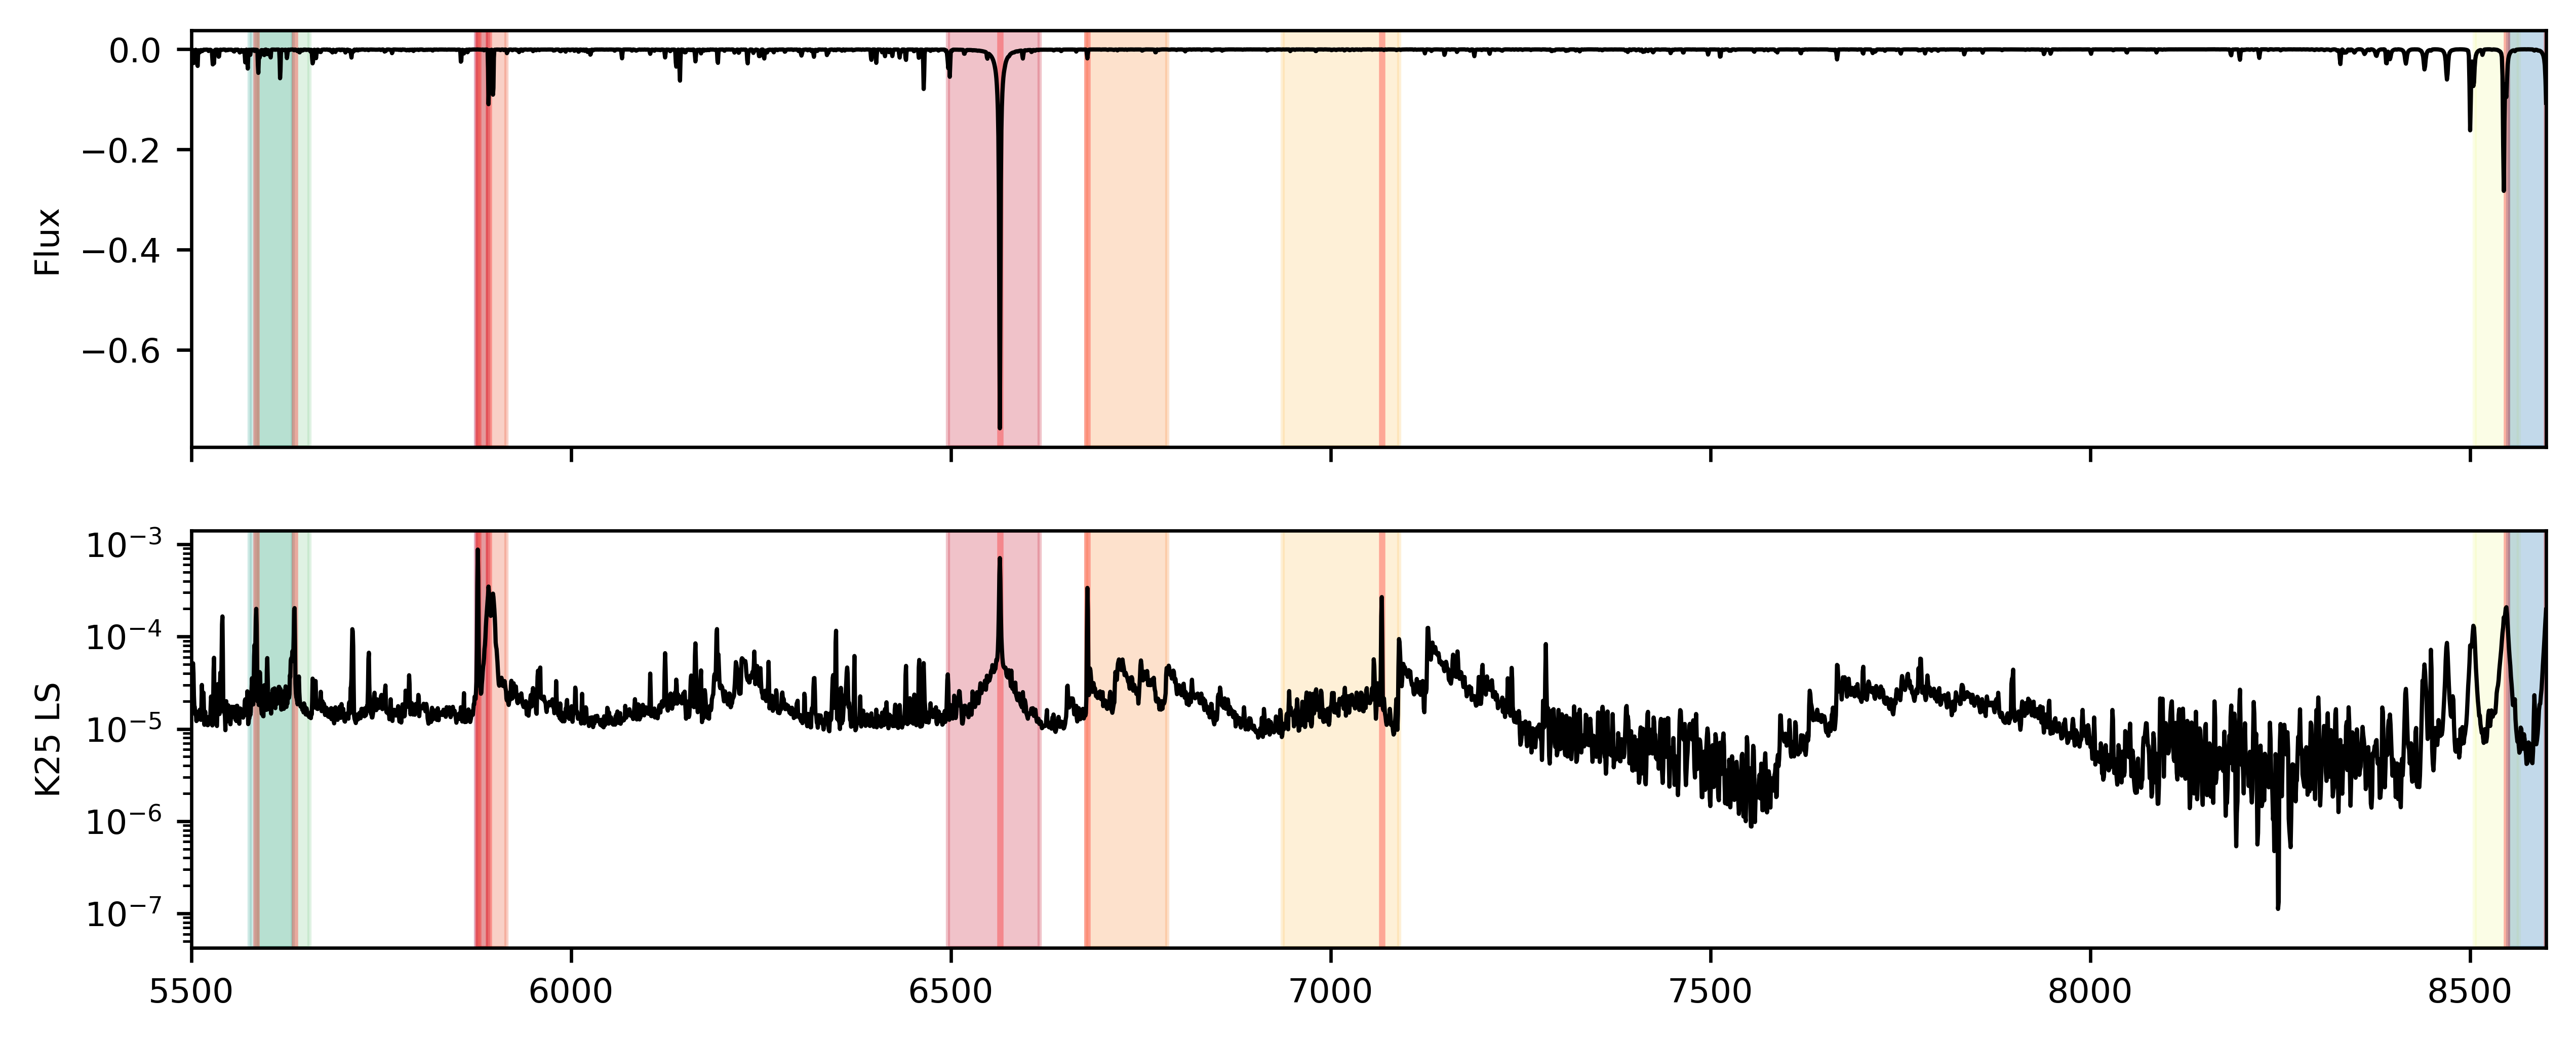

In [440]:
self.plot_flux_rois(fluxx)
plt.xlim(5500, 8600)
# plt.xlim(8300, 8800)

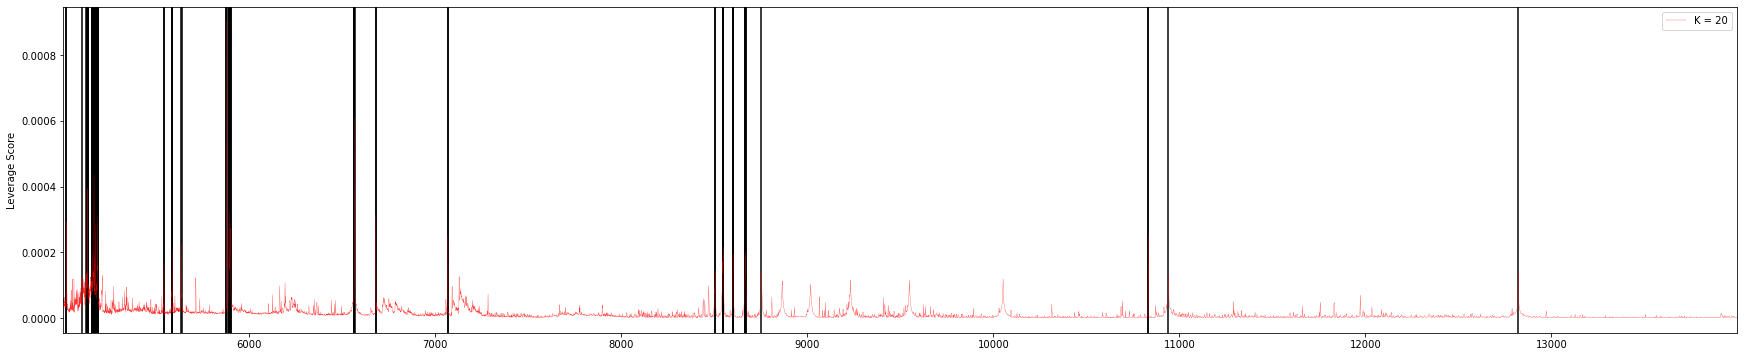

In [274]:
pidxs = np.argsort(self.lvrg[:, self.K])[-1:-100:-1]
self.plot_max_ps(pidxs=pidxs, log=0)

In [118]:
np.argsort(self.lvrg[:, self.K])[-1:-10:-1]

array([1640,  326, 1641,  325, 2722, 1650, 1639, 1651,  327])

In [54]:
ddlambda = np.sum(dlambda[(pidx-5):(pidx+5)])

In [55]:
ddlambda

13.128641700000001

In [56]:
lss / ddlambda

0.04904431612564144

In [57]:
dlambda[pidx]

1.31292978

In [58]:
pidx

2722